
### **Advanced Clustering Techniques**

At its core, clustering is about grouping data points in such a way that points in the same group are more similar to each other than to those in other groups. It's an unsupervised learning technique, meaning we don't have pre-labeled data. Instead, we're trying to uncover hidden patterns or structures within the data.

**Clustering vs. Classification**
While both clustering and classification involve grouping data, there's a fundamental difference:
- **Classification** is a supervised learning task where we assign predefined labels to instances based on their features. We already know what we're looking for.
- **Clustering**, on the other hand, is like exploring uncharted territory. We don’t have labels; instead, we try to identify clusters or groups within our data based on similarities.

**How is clustering used?**
1. **Exploratory Data Analysis:** It helps in understanding the underlying structure and distribution of our data.
2. **Dimensionality Reduction:** While we'll cover this in a future lecture, clustering can serve as a precursor to reducing data dimensions.
3. **Anomaly Detection:** Outliers or anomalies often don't belong to any cluster, making them easier to detect.
4. **Recommendation Systems:** Think of movie or product recommendations where items in the same cluster might appeal to a particular user.

**Techniques We'll Explore Today:**
1. **Hierarchical Agglomerative Clustering (HAC):** A method that builds nested clusters by successively merging or splitting groups.
2. **Density-Based Clustering: DBScan & HDBScan:** Techniques that cluster data into dense regions separated by sparser regions.
3. **Spectral Clustering:** A graph-based approach that uses the spectrum of the graph Laplacian to cluster nodes.
4. **Gaussian Mixture Models (GMM):** Probabilistic models that assume data is generated from a mixture of several Gaussian distributions.
5. **Mean-shift Clustering:** A method that identifies modes in the data distribution using kernel density estimation.

**Key Takeaway:**
- Not all data is spherical or convex, and thus, not all clustering techniques will fit every dataset.
- The choice of clustering algorithm can influence the shapes, sizes, and types of clusters we discover.
- Understanding the strengths and limitations of each technique is crucial for effective data analysis.


### **Hierarchical Agglomerative Clustering (HAC)**

Hierarchical Agglomerative Clustering (HAC) is one of the most intuitive and fundamental clustering methods. Unlike k-means, which partitions the dataset into non-overlapping clusters, HAC builds a hierarchy or a tree of clusters.

**How Does HAC Work?**

1. **Initialization:** Start by treating each data point as a single cluster. Thus, if there are *N* data points, we have *N* clusters at the start.

2. **Agglomeration:** In each of the subsequent stages, the two clusters that are closest to each other are merged into a single cluster, reducing the total number of clusters by one.

3. **Completion:** This process is repeated until there is only one single cluster left, comprising all data points. The result of this process is a tree-like diagram called a **dendrogram**, which shows the sequence in which clusters were merged and can give insights into the hierarchical structure of the data.


In [1]:
#Sklearn's implementation is the "AgglomerativeClustering" method
#n_clusters allows us to determine where the cut point is

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Perform HAC
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hac.fit_predict(data)

print(labels)  # This will print the cluster labels for each sample in the Iris dataset


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


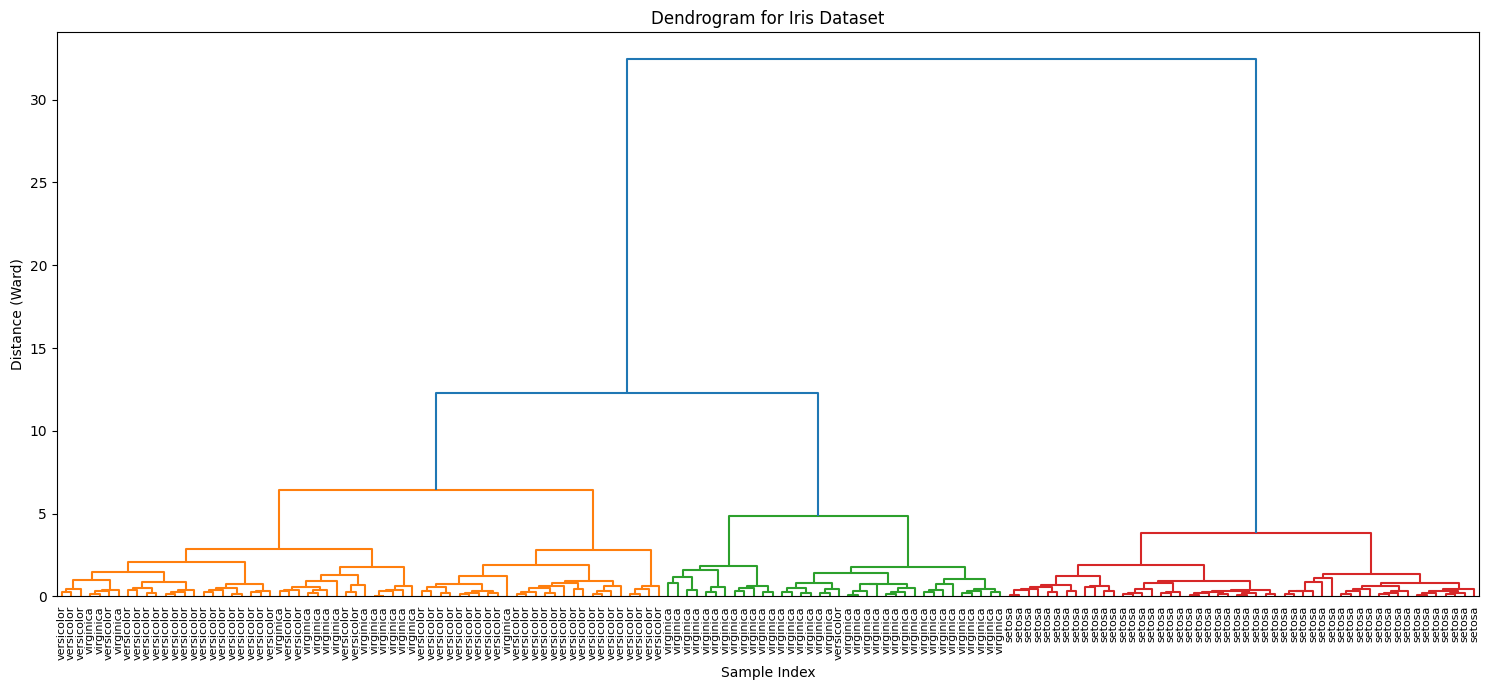

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Convert target classes to string labels
label_names = iris.target_names
labels = [label_names[i] for i in target]

# Perform hierarchical clustering
linked = linkage(data, 'ward')

# color threshold sets where the topmost clusters are
color_threshold = 10

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', labels=labels, leaf_font_size=8, color_threshold=color_threshold)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Ward)')
plt.tight_layout()
plt.show()



Note that as with k-means, determining how many clusters remains a challenge.  All the methods used in k-means (elbow method, silhouette scores, visual inspection, stability analysis, etc.) can be applied here as well.

#### Understanding linkage

The key to HAC is the criterion used to determine the "distance" between two clusters, known as the linkage. There are several linkage methods:

- **Single Linkage:** The distance between two clusters is defined as the shortest distance between two points in each cluster.
- **Complete Linkage:** The distance is defined as the maximum distance between two points in each cluster.
- **Average Linkage:** The distance between clusters is the average distance between each point in one cluster to every point in the other cluster.

|![single linkage](assets/single_linkage.png) |![avg linkage](assets/average_linkage.png)  |![complete linkage](assets/complete_linkage.png)  |
|--|--|--|
|Single linkage|Average linkage|Complete linkage|

- **Ward's Linkage:** Ward's linkage is a little trickier, but often outperforms the others. In a nutshell, the distance between clusters is calculated as the increase in the squared error (within cluster variance) when two clusters are merged. Formally:

Given two clusters $ C_i $ and $ C_j $, the increase in the squared error (or variance) when merging them is given by:

$$ \Delta_{ij} = \frac{|C_i| \times |C_j|}{|C_i| + |C_j|} \times d^2(C_i, C_j) $$

Where:
- $ |C_i| $ and $ |C_j| $ are the number of points in clusters $ C_i $ and $ C_j $ respectively.
- $ d(C_i, C_j) $ is the distance between the centroids of the two clusters. This distance is typically computed using the Euclidean distance.

The term $ \frac{|C_i| \times |C_j|}{|C_i| + |C_j|} $ is a scaling factor that accounts for the sizes of the two clusters. It ensures that large and distant clusters don't dominate the decision to merge.

In Ward's method, at each step of the agglomeration, the pair of clusters that results in the smallest value of $ \Delta_{ij} $ (i.e., the smallest increase in total variance) is merged.

The Ward linkage method tends to produce more equally-sized and spherical clusters. This is because it bases its decisions on minimizing the variance, which in turn can be thought of as minimizing the spread of cluster points around their centroid. 

However, it's important to note that Ward's method assumes that the clusters are roughly spherical and equally sized, and it may not work as well when these assumptions are violated.


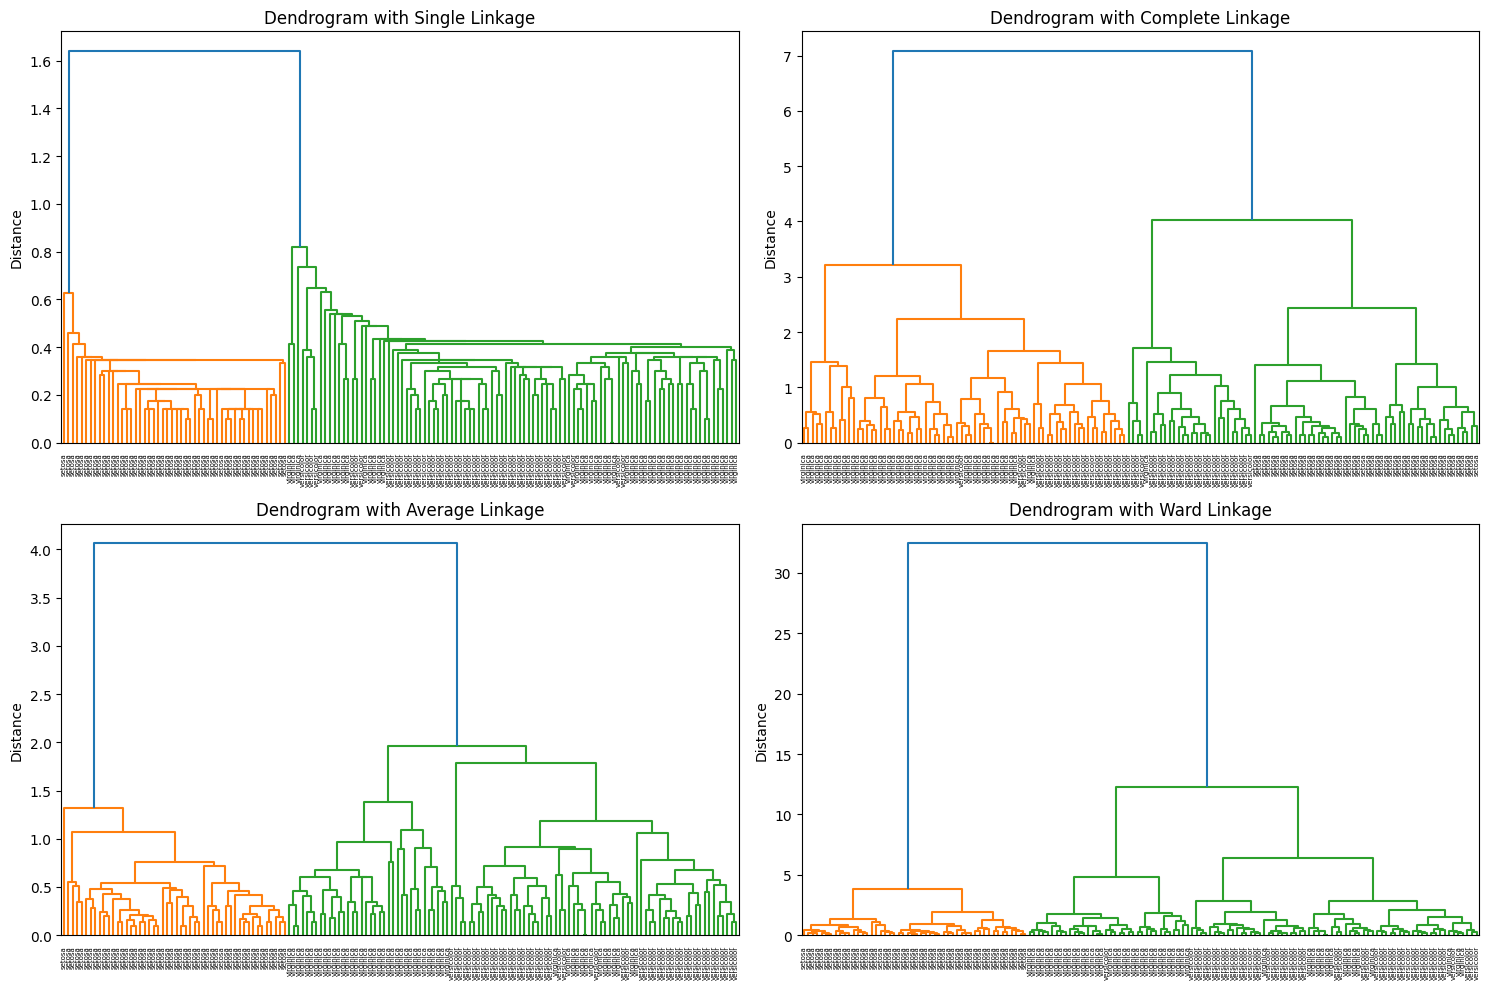

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Convert target indices to string labels
label_names = iris.target_names
labels = [label_names[i] for i in target]

# List of linkage methods to be explored
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms for each linkage method
plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods, 1):
    linked = linkage(data, method)
    
    plt.subplot(2, 2, i)
    dendrogram(linked, labels=labels, leaf_font_size=5)
    plt.title(f'Dendrogram with {method.capitalize()} Linkage')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()




**Advantages of HAC:**

1. **No Need to Specify Number of Clusters:** Unlike k-means, we don't need to define the number of clusters a priori. The number of clusters can be determined by inspecting the dendrogram.
2. **Flexibility with Distance Metrics:** Can use any desired distance metric using the "metric" parameter in scipy (Euclidean, Manhattan, Cosine, etc.).
3. **Provides Hierarchical Decomposition:** Can be useful if the data has inherent hierarchical structure.

**Limitations of HAC:**

1. **Computational Complexity:** HAC can be computationally expensive for large datasets.
2. **Irreversible:** Once a decision is made to combine two clusters, it cannot be undone.

**Practical Tips and Considerations:**

1. **Scaling:** It's generally a good practice to scale the data so that all features have the same weight.
2. **Noise and Outliers:** HAC can be sensitive to noise and outliers. Consider preprocessing steps to mitigate their impact.
3. **Choosing the Right Linkage:** The choice of linkage can significantly impact the resulting clusters. It's often beneficial to experiment with different linkages to see which one works best for a particular dataset.


### **Density-Based Clustering**

In contrast to centroid-based methods like k-means or hierarchical methods like HAC, density-based clustering methods work by identifying "dense" regions of data points separated by regions that are relatively empty. Points in sparse regions are typically treated as noise or border points.

### **DBScan (Density-Based Spatial Clustering of Applications with Noise)**

**Main Idea:** Group together data points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

**Key Parameters:**
- `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- `min_samples`: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

**How Does DBScan Work?**
1. **Core Point:** A point is a core point if at least `min_samples` points are within distance `eps` of it (including the point itself).
2. **Border Point:** A point is a border point if it's within `eps` distance of a core point but has fewer than `min_samples` within its `eps` neighborhood.
3. **Noise or Outlier:** A point that's neither a core nor a border point.

The algorithm starts with an arbitrary point and retrieves all points in its `eps` neighborhood. If the point is a core point, a cluster is formed. If it's a border point, no points are density-reachable from it, and the algorithm visits the next point. This continues until all points are processed.

**Advantages:**
- Can find arbitrarily shaped clusters.
- Doesn't require specifying the number of clusters.
- Can mark outliers.

**Limitations:**
- Struggles with clusters of varying densities.
- Not well-suited for high-dimensional data.


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


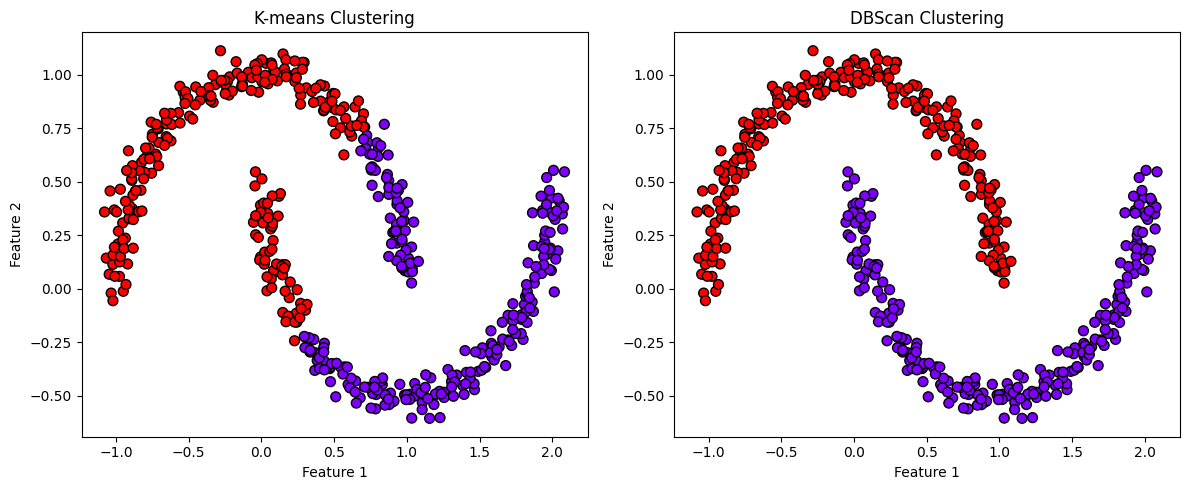

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN

# Generate the make_moons dataset
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans_clusters = kmeans.fit_predict(X)

# Apply DBScan clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap="rainbow", edgecolor="k", s=50)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap="rainbow", edgecolor="k", s=50)
plt.title("DBScan Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()



### **HDBScan (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**

**Main Idea:** HDBScan is an extension of DBScan that can detect clusters of varying densities. It works by transforming the space according to the density/sparsity, then applying hierarchical clustering.

**How Does HDBScan Work?**
1. **Transform the space so that the distance between points represents density.**  For each pair of points, the **mutual reachability distance** is defined as the maximum of three values: the actual distance between the two points, the core distance of the first point, and the core distance of the second point. The core distance of a point is the distance from the point to its `min_samples`-th nearest neighbor.

In [ ]:
!pip install hdbscan

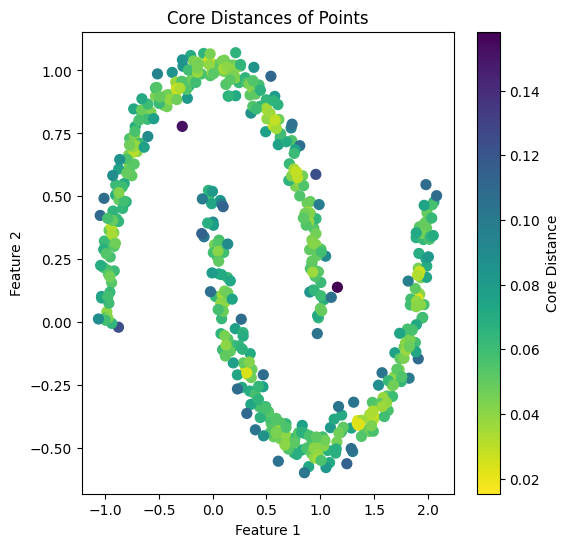

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors

# Generate synthetic data
data, _ = make_moons(n_samples=500, noise=0.05)

# Calculate core distances using NearestNeighbors
min_samples = 5  # This should be consistent with the min_samples value you use for HDBScan
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(data)
distances, _ = nearest_neighbors.kneighbors(data)
core_distances = distances[:, -1]  # Get the distance to the min_samples-th nearest neighbor

# Plot data colored by core distance
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c=core_distances, cmap='viridis_r', s=50)
plt.colorbar(label='Core Distance')
plt.title('Core Distances of Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()





2. **Build the minimum spanning tree of the distance-weighted graph.** Each point is a node, and the edge weights are the mutual reachability distances. The minimum spanning tree (MST) connects all points in such a way that the sum of the edge weights is minimized. The MST ensures that denser regions are connected first, leaving sparser regions to be connected later (potentially as noise).



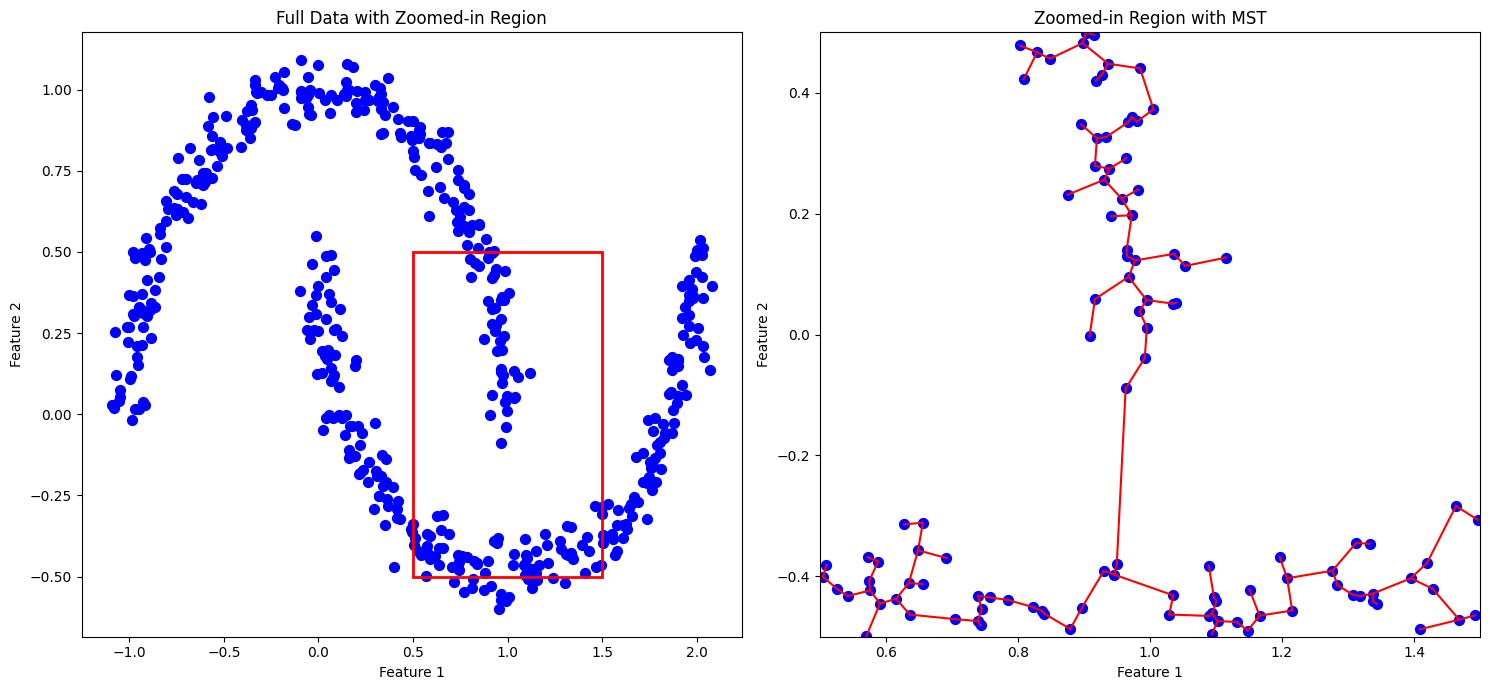

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree

# Generate synthetic data
data, _ = make_moons(n_samples=500, noise=0.05)

# Define the zoomed-in region
x_min, x_max, y_min, y_max = 0.5, 1.5, -0.5, 0.5
filtered_data = data[(data[:, 0] > x_min) & (data[:, 0] < x_max) & (data[:, 1] > y_min) & (data[:, 1] < y_max)]

# Compute the MST for the filtered data
distance_matrix = squareform(pdist(filtered_data))
mst = minimum_spanning_tree(distance_matrix).toarray()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Left plot: Full data with zoomed-in box
ax1.scatter(data[:, 0], data[:, 1], c='blue', s=50)
ax1.set_title('Full Data with Zoomed-in Region')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
rectangle = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
ax1.add_patch(rectangle)

# Right plot: Zoomed-in data with MST
ax2.scatter(filtered_data[:, 0], filtered_data[:, 1], c='blue', s=50)
for i in range(mst.shape[0]):
    for j in range(mst.shape[1]):
        if mst[i, j] != 0:
            ax2.plot([filtered_data[i, 0], filtered_data[j, 0]], [filtered_data[i, 1], filtered_data[j, 1]], 'r-')
ax2.set_xlim([x_min, x_max])
ax2.set_ylim([y_min, y_max])
ax2.set_title('Zoomed-in Region with MST')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()



3. **Construct a hierarchy of connected components.** As you increase a distance threshold from the minimum to the maximum mutual reachability distance, edges in the MST longer than this threshold are removed. This process results in the splitting of the MST into multiple connected components (clusters). Tracking these splits as the threshold increases gives a hierarchy of connected components.
4. **Condense the tree, then extract the stable clusters.**
   - **Condensing the Tree**: The hierarchical tree from the previous step can be vast and intricate. To simplify, a condensed tree is constructed where only the most "prominent" clusters (that persist over a range of thresholds) are retained.
   - **Extracting Clusters**: From the condensed tree, stable clusters are extracted based on their persistence (i.e., the range of thresholds over which they exist). A cluster that persists over a large range is considered stable and is less likely to be just noise or an artifact of the data.

Visualizing the final step can be a condensed tree diagram, followed by a plot of the data points colored based on their cluster assignments.

**Key Parameters:**
- `min_cluster_size`: The minimum size of clusters; smaller clusters are treated as noise.
- `min_samples`: Similar to DBScan, used for the soft clustering part of HDBScan, where points may be assigned to multiple clusters (akin to a fuzziness parameter).

**Advantages:**
- Can find clusters of varying densities.
- Doesn't require specifying the number of clusters.
- More flexible than DBScan.

**Limitations:**
- More complex and computationally intensive than DBScan.
- Still can struggle in very high-dimensional spaces.

### Exercise

In the following example, use the parameters for DBScan and HDBScan to optimize the fit for data.  Can you find parameter setting that result in approximately the same clustering?  How would you do this without visual inspection?

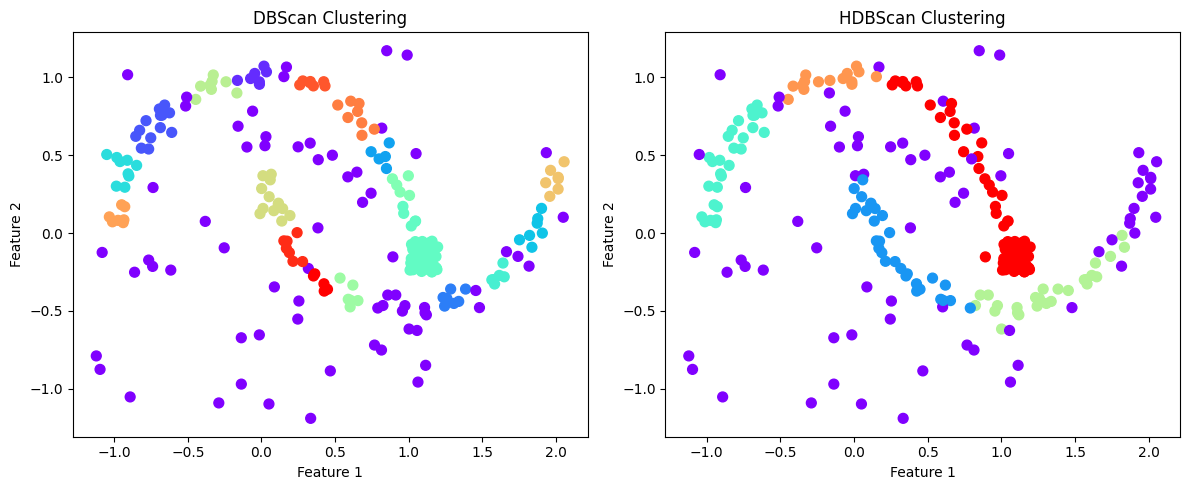

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan
from sklearn.cluster import DBSCAN

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# DBScan clustering
dbscan_labels = DBSCAN(eps=0.11, min_samples=5).fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow', s=50)
ax1.set_title('DBScan Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


### **Spectral Clustering**

As illustrated with HDBScan above, data can be represented as a graph, where:

- **Nodes**: Represent individual data points.
- **Edges**: Connect pairs of data points. The weight of an edge typically reflects the similarity between two nodes.

To capture the pairwise similarities between data points, we construct an **Affinity Matrix**. Common methods to define similarity include:

- Gaussian kernel of the Euclidean distance (i.e. standard deviation based on local data)
- Nearest neighbors.

The goal of graph-based clustering methods is to partition the graph such that:
- Edges between different groups have low weights (indicating dissimilarity).
- Edges within a group have high weights (indicating similarity).


#### Graph Laplacian and its Eigenvalues**

The **Laplacian Matrix** of a graph captures information about the degree of each vertex and the edges of the graph. It is defined as:
$ L = D - W $
Where:
-$ L $ is the Laplacian matrix.
- $ D $ is the diagonal degree matrix.
- $ W $ is the affinity matrix.

The eigenvalues and eigenvectors of the Laplacian matrix play a pivotal role in spectral clustering. For a graph with $ n $ connected components, the smallest $ n $ eigenvalues of its Laplacian are zero.

The eigenvector corresponding to the second smallest eigenvalue (Fiedler vector) is used for bipartitioning the graph. The sign of its components can determine the two clusters. For more clusters, the data is embedded using the first $ k $ eigenvectors, and then k-means can be applied in this space.

***Why the Laplacian?***

The Laplacian is a mathematical representation of a graph that helps to make the clustering structure more apparent.  For instance, consider the following example:


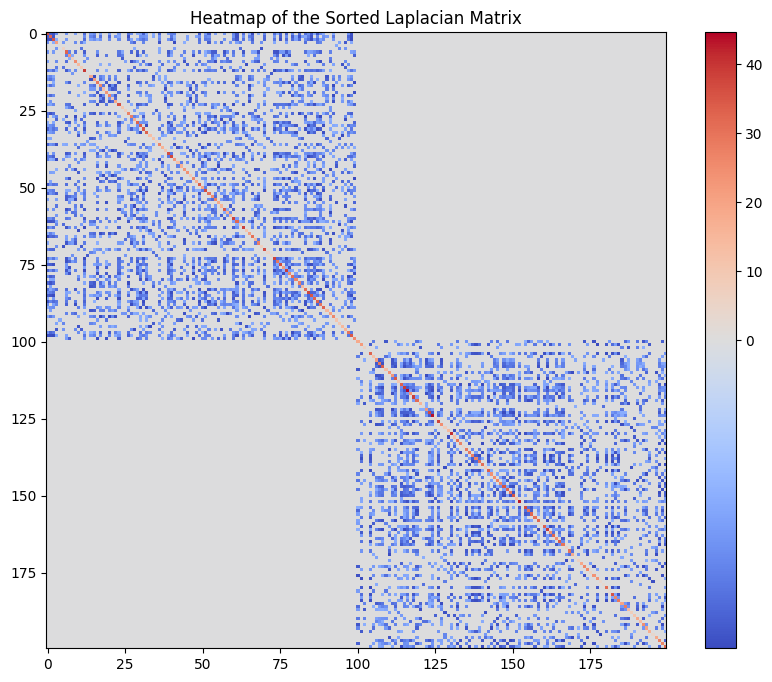

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import laplacian
import matplotlib.colors as mcolors

# 1. Generate synthetic data with two distinct blobs
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=42)

# 2. Construct the affinity (or adjacency) matrix using RBF kernel
sigma = 1.0
distances = pairwise_distances(X, squared=True)
affinity_matrix = np.exp(-distances / (2.0 * sigma**2))
threshold = 0.5
affinity_matrix[affinity_matrix < threshold] = 0

# 3. Compute the Laplacian matrix
L = laplacian(affinity_matrix, normed=False)

# 4. Sort the Laplacian matrix based on cluster assignments
sorted_idx = np.argsort(y)
L_sorted = L[sorted_idx, :]
L_sorted = L_sorted[:, sorted_idx]

# 5. Create a custom colormap normalization to emphasize smaller negative values
norm = mcolors.TwoSlopeNorm(vmin=L_sorted.min(), vmax=L_sorted.max(), vcenter=0)

# 6. Visualize the sorted Laplacian matrix with the custom normalization
plt.figure(figsize=(10, 8))
plt.imshow(L_sorted, cmap='coolwarm', aspect='auto', norm=norm)
plt.colorbar()
plt.title("Heatmap of the Sorted Laplacian Matrix")
plt.show()





#### How Spectral Clustering Identifies Non-convex Clusters

Spectral clustering's strength lies in its ability to detect non-convex clusters. This non-linear clustering capability is derived from its use of the graph structure and eigenvalues of the Laplacian.


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


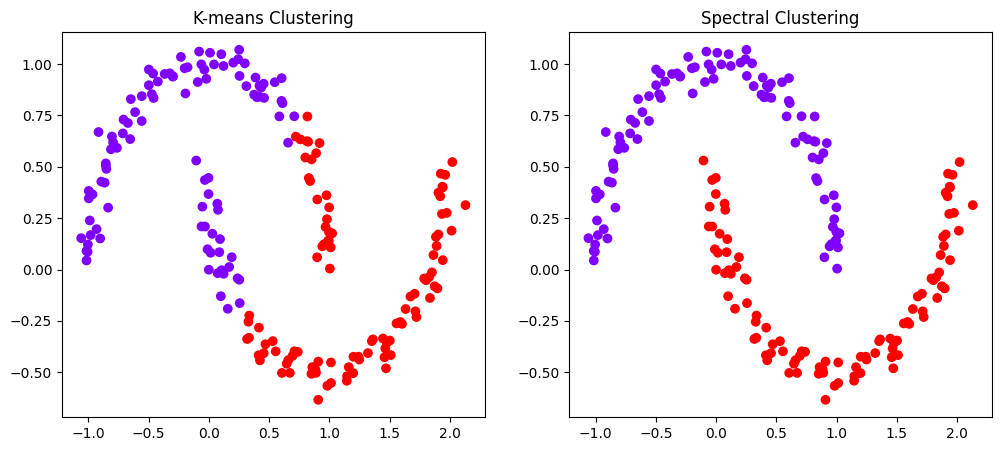

In [49]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt

data, labels = make_moons(n_samples=200, noise=0.05)
spectral_labels = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(data)
kmeans_labels = KMeans(n_clusters=2).fit_predict(data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='rainbow')
ax1.set_title('K-means Clustering')
ax2.scatter(data[:, 0], data[:, 1], c=spectral_labels, cmap='rainbow')
ax2.set_title('Spectral Clustering')
plt.show()

#### Key Parameters

1. **Number of Clusters (`n_clusters`)**:
   - This parameter specifies how many clusters the algorithm should partition the data into. It's akin to the "k" in k-means clustering.
   
2. **Affinity (`affinity`)**:
   - This defines the method used to compute the affinity matrix, which captures the pairwise similarity between points. Common choices include:
     - **'nearest_neighbors'**: Compute the affinity matrix based on the number of nearest neighbors. This often results in a graph with local neighborhood structures.
     - **'rbf'**: Uses the radial basis function (RBF or Gaussian) kernel to compute similarities. It has the form $\exp(-\gamma \times d^2) $, where $d$ is the distance between data points.
     - **'precomputed'**: If you have a precomputed affinity matrix, you can use it directly.
     - **'linear'**, **'poly'**, **'sigmoid'**, etc.: Other kernel-based similarity measures.
   - The choice of affinity can significantly impact clustering results. For instance, 'nearest_neighbors' can be useful for capturing local cluster structures, while 'rbf' may be more suitable for globular clusters.

3. **Gamma (`gamma`)**:
   - It's a parameter for the RBF, poly, sigmoid, and other kernel-based affinity measures. It determines the influence or spread of a single training example. For the RBF kernel, a smaller value of `gamma` will produce a wider spread (so points farther apart are considered similar), while a larger value will make it consider only points close to each other.

4. **Number of Neighbors (`n_neighbors`)**:
   - Relevant when `affinity` is set to 'nearest_neighbors'. It specifies how many neighbors are considered for each point when constructing the affinity matrix.

5. **Degree (`degree`)**:
   - Only used when the affinity is 'poly'. It's the degree of the polynomial kernel function.

6. **Coefficient (`coef0`)**:
   - Used in 'poly' and 'sigmoid' affinity settings. It represents an independent term in the kernel function.

Each of these parameters can influence the performance and outcome of spectral clustering. It's often beneficial to experiment with different combinations, especially for the affinity and gamma parameters, to find the most appropriate settings for a given dataset.

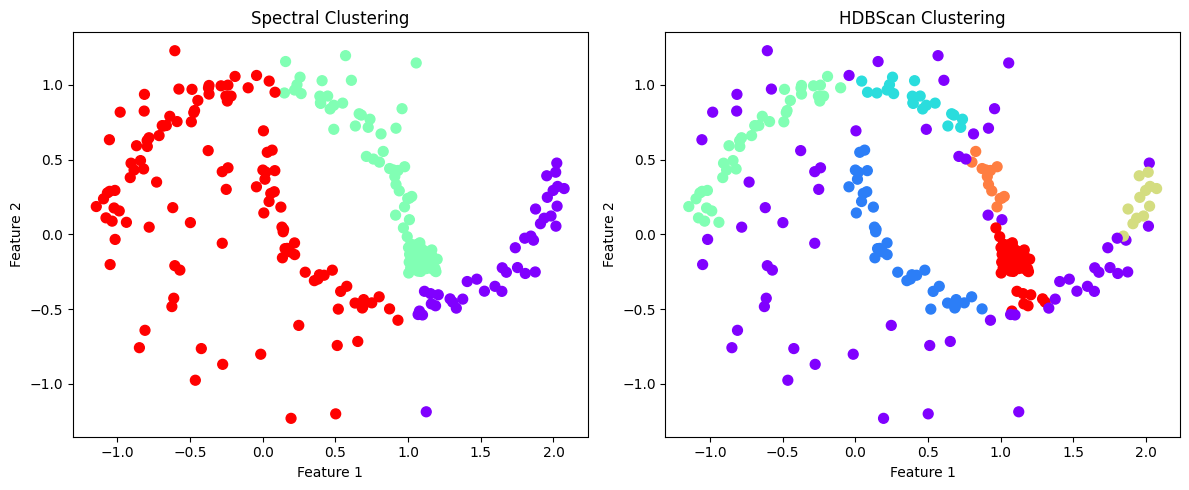

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import hdbscan

# Create synthetic data: two moons + noise + a dense small cluster
moons_data, _ = make_moons(n_samples=150, noise=0.05)
noise = np.random.rand(50, 2) * 2.5 - 1.25
dense_cluster = np.random.rand(50, 2) * 0.2 + [1, -0.25]
data = np.vstack([moons_data, noise, dense_cluster])

# DBScan clustering
spectral_labels = SpectralClustering(n_clusters=3, affinity='nearest_neighbors').fit_predict(data)

# HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10).fit_predict(data)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(data[:, 0], data[:, 1], c=spectral_labels, cmap='rainbow', s=50)
ax1.set_title('Spectral Clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ax2.scatter(data[:, 0], data[:, 1], c=hdbscan_labels, cmap='rainbow', s=50)
ax2.set_title('HDBScan Clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()



**Applications**:

- **Image Segmentation**: Grouping regions with similar pixel values or textures.
- **Social Network Analysis**: Identify tight-knit communities within larger networks.
- **Dimensionality Reduction**: Preserve the non-linear structure of the data.

**Pros**:
- Ability to detect non-convex clusters.
- Versatility across various domains.

**Cons**:
- Computationally expensive for large datasets.
- The choice of affinity matrix can influence results.


#### Spectral Clustering vs HDBScan:

- **Spectral Clustering** is particularly useful when the data has a clear non-linear structure or when the data can be naturally represented as a graph. It's also beneficial when the number of clusters is known or can be estimated.  Particularly well suited to data from social networks because of it's underlying graph-theoretic basis.

- **HDBScan** shines in scenarios where clusters are of varying densities, and there's potential noise in the data. It's also useful when the number of clusters is unknown or when a hierarchical understanding of clusters is desired. It also handles noise, but is highly sensitive to hyperparameters.

### **Gaussian Mixture Models (GMMs)**

#### Probabilistic Clustering and Soft Assignments
Most clustering algorithms, like k-means, assign data points to the closest cluster in terms of distance, resulting in a hard assignment. Each data point belongs entirely to one cluster. However, in many real-world scenarios, the boundaries between clusters aren't always clear-cut. This is where probabilistic clustering comes in.

Gaussian Mixture Models (GMMs) provide a probabilistic approach to clustering. Instead of assigning each data point to a single cluster, GMMs give probabilities that a given data point belongs to each cluster. This method results in "soft assignments," where a data point can belong to multiple clusters but with different degrees of membership.

#### Expectation-Maximization (EM) in the Context of GMM
GMMs are based on the assumption that the data is generated from a mixture of several Gaussian distributions. The goal is to identify these underlying Gaussians and their parameters.

However, a direct estimation of parameters is challenging because we don't know which data point belongs to which Gaussian. Here's where the Expectation-Maximization (EM) algorithm comes in. EM is an iterative method that consists of two main steps:

1. **Expectation (E-step)**: Given the current estimates of the Gaussian parameters, assign each data point to the Gaussians probabilistically (calculate the "responsibilities").
  
2. **Maximization (M-step)**: Given the current assignments (or responsibilities), update the parameters of the Gaussians to best fit the data.

These steps are repeated until convergence, resulting in optimized parameters for the Gaussian distributions.

#### Ability to Identify Elliptical Clusters
While k-means tends to find spherical clusters due to its distance metric, GMMs can identify elliptical (or elongated) clusters. This capability comes from the fact that each cluster in GMM is modeled by a Gaussian distribution, which can take on elliptical shapes depending on its covariance matrix.

#### Key Parameters for GMM


1. **`n_components`**: 
    - **Description**: The number of mixture components (or Gaussian distributions) to be estimated.
    - **Default**: 1
    - **Typical Usage**: Choose based on the expected number of clusters in the data.

2. **`covariance_type`**:
    - **Description**: The type of covariance matrix for each component.
    - **Options**:
        - `'full'`: Each component has its own general covariance matrix.
        - `'tied'`: All components share the same general covariance matrix.
        - `'diag'`: Each component has its own diagonal covariance matrix.
        - `'spherical'`: Each component has its own single variance.
    - **Default**: `'full'`
    - **Typical Usage**: Choice depends on the underlying data distribution and prior knowledge.

3. **`tol`**:
    - **Description**: Convergence threshold. The EM iterations will stop when the lower bound average gain is below this threshold.
    - **Default**: 1e-3
    - **Typical Usage**: Adjust if the model has convergence issues.

4. **`reg_covar`**:
    - **Description**: Non-negative regularization added to the diagonal of the covariance matrix to ensure the matrix is positive definite.
    - **Default**: 1e-6
    - **Typical Usage**: Can be increased if there are numerical issues during fitting.

5. **`n_init`**:
    - **Description**: Number of times the algorithm will be run with different initializations. The final results will be the best output of `n_init` consecutive runs in terms of the lowest Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
    - **Default**: 1
    - **Typical Usage**: Can be increased to ensure a better result, especially if the initialization affects the outcome significantly.

6. **`init_params`**:
    - **Description**: Method used to initialize the weights, means, and covariances.
    - **Options**:
        - `'kmeans'`: Parameters are initialized using k-means.
        - `'random'`: Parameters are initialized randomly.
    - **Default**: `'kmeans'`
    - **Typical Usage**: Generally, the default k-means initialization works well, but for some datasets, a random initialization may be beneficial.


### Exercise

In the following, see if you can adjust the GMM parameters so that the fifth cluster appears.


/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


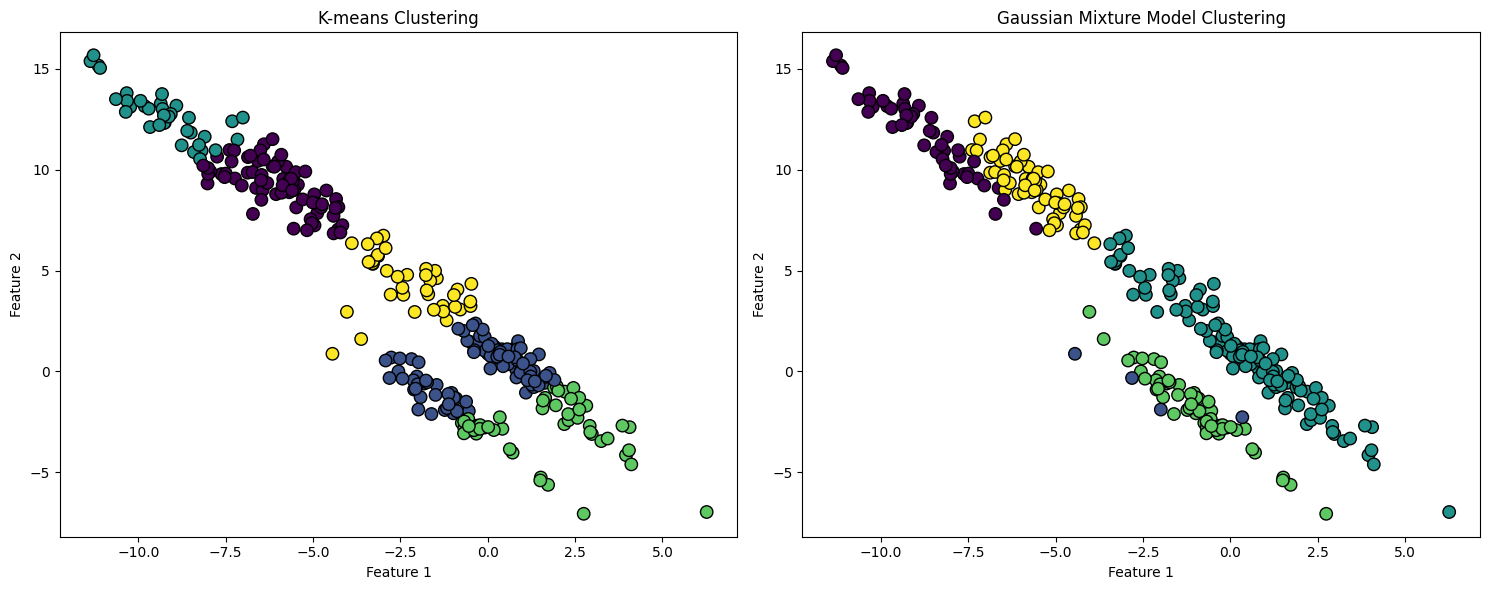

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


Note that we can view the mixed membership of each datapoint in a GMM using sklearn's API as follows:

First 10 data points:
 [[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]

Probabilities of belonging to each cluster for the first 10 data points:
 [[1.00000000e+00 5.79506157e-67 1.35999675e-60]
 [1.00000000e+00 1.36438005e-64 3.14154567e-60]
 [2.05865579e-51 1.00000000e+00 1.72369478e-15]
 [1.71564500e-45 8.23076192e-24 1.00000000e+00]
 [1.00000000e+00 1.20447754e-71 9.85406873e-70]
 [5.35909457e-46 7.86374676e-33 1.00000000e+00]
 [6.62024106e-62 1.00000000e+00 1.28187028e-22]
 [1.59110948e-42 4.03172216e-32 1.00000000e+00]
 [3.55372635e-57 1.00000000e+00 1.71082744e-22]
 [3.63941531e-62 1.00000000e+00 4.78982670e-27]]


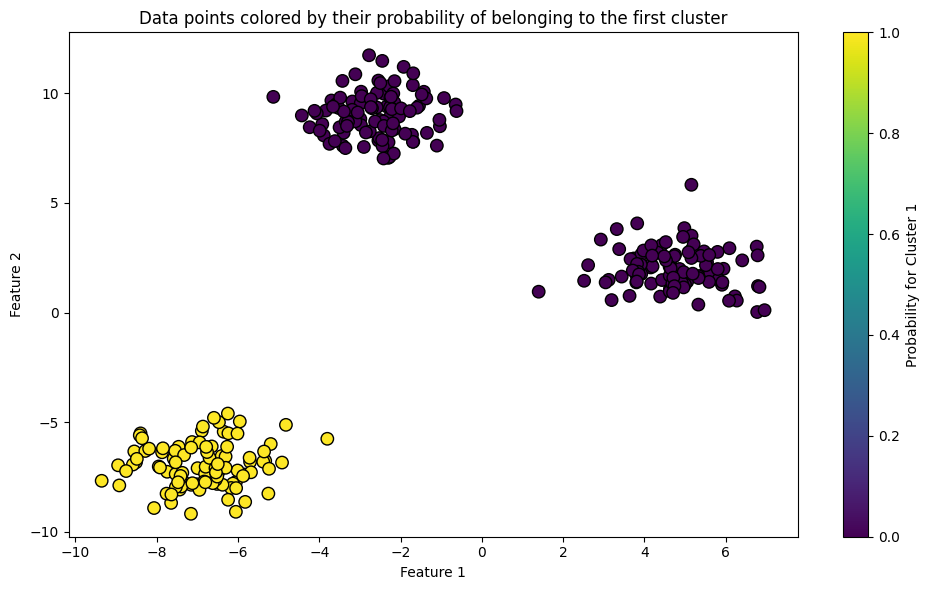

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit a GMM with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Obtain mixed membership (soft assignments) for each data point
probs = gmm.predict_proba(X)

# Display the first 10 data points and their probabilities
print("First 10 data points:\n", X[:10])
print("\nProbabilities of belonging to each cluster for the first 10 data points:\n", probs[:10])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=probs[:, 0], marker='o', edgecolors='k', s=80, cmap='viridis')
plt.title('Data points colored by their probability of belonging to the first cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability for Cluster 1')
plt.tight_layout()
plt.show()


Finally, observe that GMM's do not handle concentric clusters well.

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


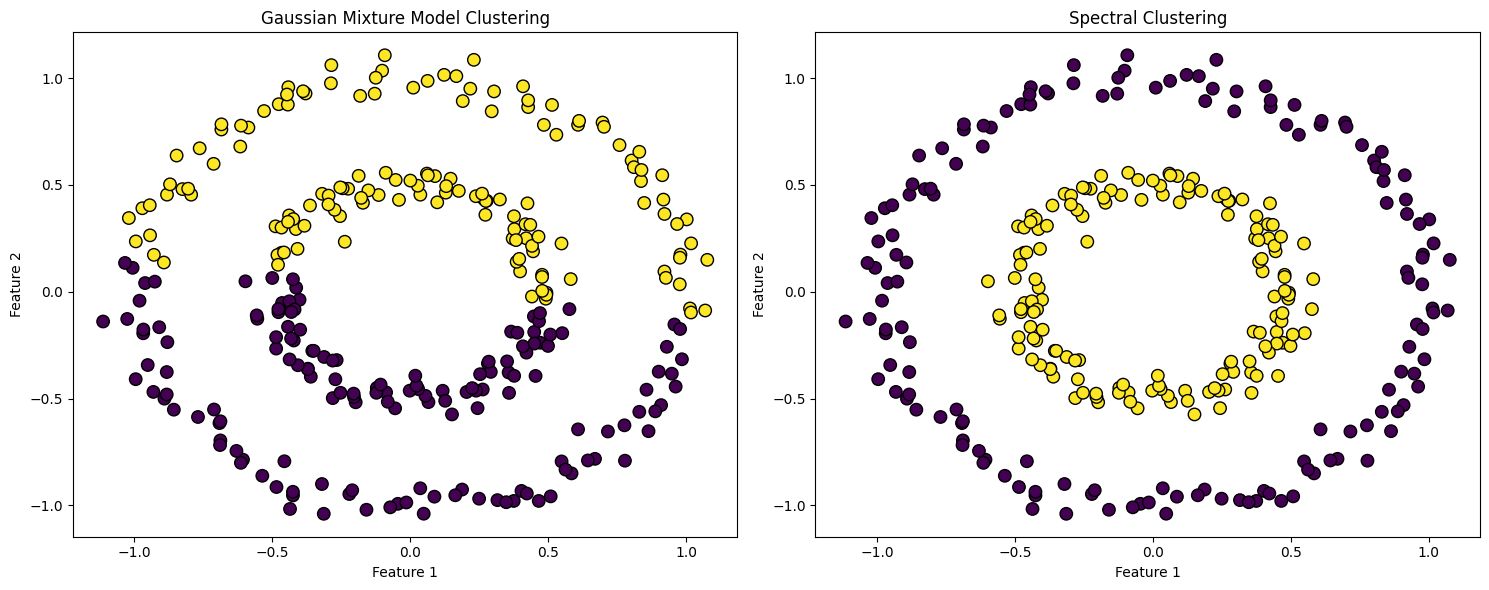

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Generate synthetic data with concentric circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply GMM
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
spectral_labels = spectral.fit_predict(X)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


### **Mean-Shift Clustering**

#### 1. Kernel Density Estimation (KDE):

Kernel Density Estimation (KDE) is a non-parametric technique used to estimate the probability density function (pdf) of a continuous random variable. Rather than counting occurrences in fixed intervals (like histograms), KDE smoothens the data points with a kernel, resulting in a continuous curve (density function).

#### 2. Mean-Shift Clustering:

Mean-shift clustering is a technique that identifies clusters in data based on the density of data points. The core idea is to identify the "modes" or peaks of the density, where the density is estimated using KDE.

#### Algorithm:
1. Choose a bandwidth parameter, which determines the size of the kernel and, consequently, the smoothness of the estimated density.
2. For each data point, place the kernel at that point and compute the mean (or "centroid") of the data within the kernel.
3. Shift the kernel to the location of the mean and repeat until convergence.
4. Once all points converge (or stop moving), those moving to the same mode or peak are considered part of the same cluster.

#### 3. Mean-Shift's Ability to Find Non-spherical Clusters:

Mean-Shift doesn't make assumptions about the shape of clusters, unlike methods like k-means. Instead, it uses the underlying density of data points to find and adapt to the shape of each cluster. As a result, mean-shift can detect clusters of any shape, including elongated or irregularly shaped clusters.

#### Key Parameters

1. **`bandwidth`**:
    - **Description**: The bandwidth of the kernel. If `None`, the bandwidth is estimated using a heuristic based on the median of pairwise distances among the data points.
    - **Typical Usage**: A smaller bandwidth will produce more clusters, while a larger bandwidth may merge distinct clusters. If unsure, using the `estimate_bandwidth` function from `sklearn` can provide a reasonable starting point.

2. **`seeds`**:
    - **Description**: Initial seeding points for the clustering. If `None`, the algorithm uses a flat kernel to initialize.
    - **Typical Usage**: Generally, this is left as `None` for the algorithm to automatically choose seed points. However, if you have prior knowledge about the data or potential cluster centers, you can provide them.

3. **`bin_seeding`**:
    - **Description**: If `True`, initial kernel locations are not locations of all data points, but rather the location of the discretized version of the data, where data points are binned onto a grid whose coarseness corresponds to the bandwidth.
    - **Default**: `False`
    - **Typical Usage**: Setting this to `True` can speed up the algorithm, especially when the number of data points is large. However, it might compromise the accuracy of cluster assignments.

4. **`min_bin_freq`**:
    - **Description**: To speed up the algorithm, accept only those bins with at least `min_bin_freq` points as seeds.
    - **Default**: 1
    - **Typical Usage**: Increase this if the dataset is large and you're using `bin_seeding=True`. It helps in ignoring bins with fewer points, potentially speeding up the process.

5. **`cluster_all`**:
    - **Description**: If `True`, all the data points that are not assigned to any cluster (outliers) are assigned to the closest cluster center. If `False`, outliers are given the label `-1`.
    - **Default**: `True`
    - **Typical Usage**: If you suspect the presence of outliers or want to explicitly handle data points that don't belong to any cluster, set this to `False`.


### Exercise

Adjust the preceding parameters to see if you can improve the clustering.

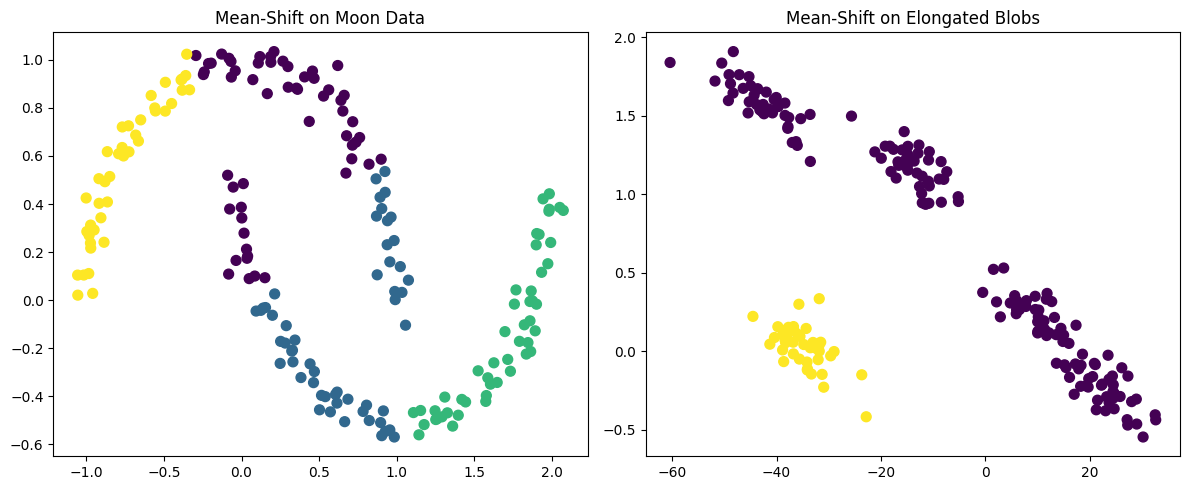

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

# Generate synthetic data: two moon shapes and elongated blobs
X_moons, _ = make_moons(n_samples=200, noise=0.05)
X_blobs, y = make_blobs(n_samples=200, centers=5, random_state=42)

# Create a transformation matrix to stretch the blob
transformation_matrix = np.array([[5, -.1], [0, 0.1]])

# Apply the transformation to the blobs
X_blobs_stretched = np.dot(X_blobs, transformation_matrix)


# Mean-Shift clustering
bandwidth_moons = estimate_bandwidth(X_moons, quantile=0.2)
ms_moons = MeanShift(bandwidth=bandwidth_moons).fit(X_moons)

bandwidth_blobs = estimate_bandwidth(X_blobs_stretched, quantile=0.2)
ms_blobs = MeanShift(bandwidth=bandwidth_blobs).fit(X_blobs)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=ms_moons.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Moon Data')

plt.subplot(1, 2, 2)
plt.scatter(X_blobs_stretched[:, 0], X_blobs_stretched[:, 1], c=ms_blobs.labels_, cmap='viridis', s=50)
plt.title('Mean-Shift on Elongated Blobs')

plt.tight_layout()
plt.show()

### Cheatsheet

Although YMMV with specific data problems, here's a quick "cheatsheet" you can use when choosing amongst clustering methods.


| **Method**           | **Key Control Parameters**                      | **Merits**                                                                      | **Use-Cases**                                                                                                  |
|----------------------|-------------------------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **K-means**          | - `n_clusters` (number of clusters)<br>- `init` (initialization method) | - Simple and fast<br>- Scalable to large datasets                               | - Spherical clusters<br>- Large datasets<br>- Known number of clusters                                         |
| **HAC**              | - `n_clusters` (number of clusters)<br>- `linkage` (linkage criterion)    | - Hierarchical representation<br>- No predefined number of clusters              | - Hierarchical structure<br>- Small to medium-sized datasets                                                    |
| **DBScan**           | - `eps` (max distance between samples)<br>- `min_samples` (min points in neighborhood) | - Arbitrarily shaped clusters<br>- Handles noise                                | - Spatial datasets with noise<br>- Clusters of varying densities                                               |
| **HDBScan**          | - `min_samples` (min points to form a cluster)<br>- `min_cluster_size` (smallest cluster size) | - Varying densities<br>- Hierarchical approach                                  | - Clusters of different sizes<br>- Noisy data                                                                  |
| **Spectral Clustering** | - `n_clusters` (number of clusters)<br>- `affinity` (similarity metric)      | - Non-convex clusters<br>- Graph-based approach                                 | - Complex cluster structures<br>- Graph-based clustering problems                                               |
| **GMM**              | - `n_components` (number of mixtures)<br>- `covariance_type` (shape of the distribution) | - Soft clustering<br>- Elliptical clusters                                      | - Elliptical clusters<br>- Soft assignments<br>- Gaussian distribution                                          |
| **Mean-shift**       | - `bandwidth` (radius of the region)<br>- `bin_seeding` (initial seeding strategy)  | - No assumption on number of clusters<br>- Non-spherical clusters                | - Unknown number of clusters<br>- Non-spherical clusters                                                        |



### Exercise

The following example sets up a clustering problem with the MNIST handwriting data.  Try the different clustering techniques above to improve the clustering.  What works the best?  What happens if you use "X" instead of "X_scaled"?

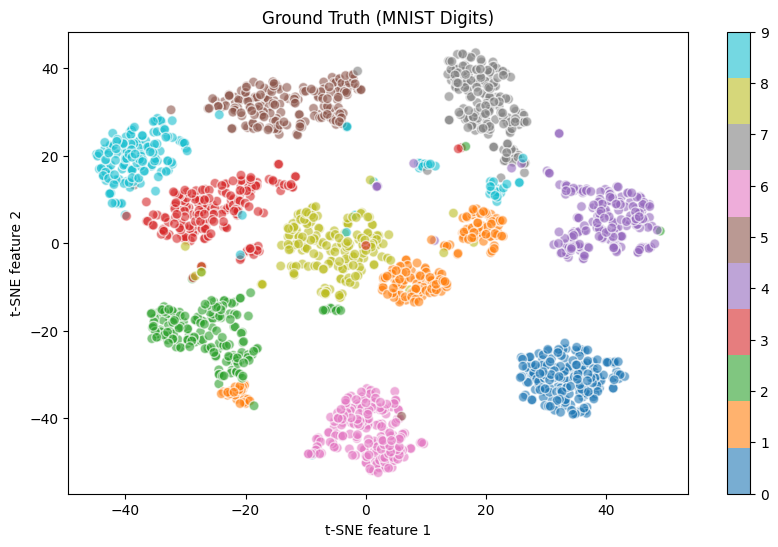

/Users/jeintron/Dropbox/@TEACHING/2023/FALL23/DEV/ist407-707.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


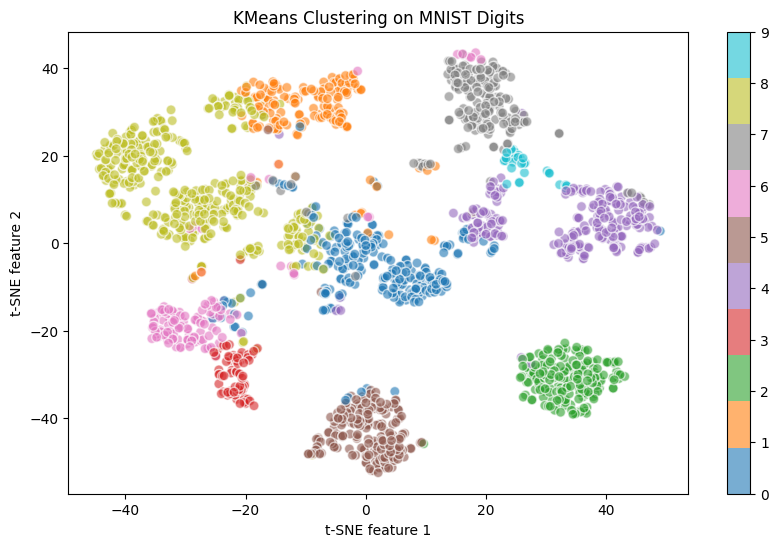

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the MNIST digit data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization function
def visualize_clusters(X_2D, labels, title=""):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6, edgecolors='w')
    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.colorbar(scatter)
    plt.show()

# Visualize ground truth
visualize_clusters(X_tsne, y, title="Ground Truth (MNIST Digits)")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize KMeans clustering results
visualize_clusters(X_tsne, kmeans_labels, title="KMeans Clustering on MNIST Digits")

